In [2]:
%pylab inline
import pandas as pd
from sys import platform
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from geopy.geocoders import Nominatim
import folium
from datetime import datetime
from meteostat import Point, Daily

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
### Load race and mereged DataFrames

weather = pd.read_csv(path + 'data/weather.csv')

In [4]:
warm = weather.warm.value_counts()
cold = weather.cold.value_counts()
dry = weather.dry.value_counts()
wet = weather.wet.value_counts()
cloudy = weather.cloudy.value_counts()

total_count = weather.shape[0]

In [5]:
weather.query('wet == True')

,season,round,circuit_id,weather,warm,cold,dry,wet,cloudy
2,2020,3,hungaroring,"Wet at start, partly cloudy",False,False,False,True,True
13,2020,14,istanbul,Overcast. Wet and drying track. Air: 11–14 °C ...,False,False,False,True,False
18,2021,2,imola,"Wet at start, drying during race, 9 °C (48 °F)",False,False,False,True,False
27,2021,11,hungaroring,Rain and sunny. Ambient: 26 to 29 °C (79 to 84...,False,False,False,True,False
28,2021,12,spa,"Wet, persistent rain",False,False,False,True,False
31,2021,15,sochi,Cloudy and rainy,False,False,False,True,True
32,2021,16,istanbul,Overcast with intermittent rain,False,False,False,True,True


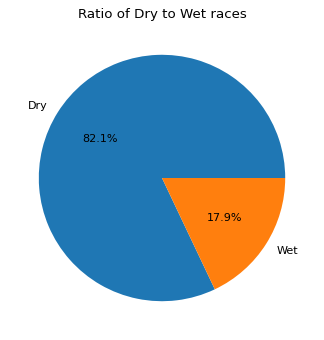

In [6]:
fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

labels = 'Dry', 'Wet'
sizes = wet.values

axs.set_title('Ratio of Dry to Wet races')
axs.set_xlabel('')
axs.set_ylabel('')
axs.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.show()

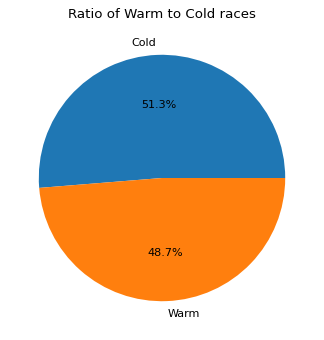

In [7]:
fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

labels = 'Cold', 'Warm'
sizes = warm.values

axs.set_title('Ratio of Warm to Cold races')
axs.set_xlabel('')
axs.set_ylabel('')
axs.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.show()

In [8]:
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

vancouver = Point(49.2497, -123.1193, 70)

data = Daily(vancouver, start, end)
data = data.fetch()

data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>